In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import re

In [2]:
data = pd.read_csv("C:/Users/shach/Desktop/third year/semester b/python/matala2/matala2_cosmetics_2019-Nov.csv")
data.tail()

C:\Users\shach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063
4635836,2019-11-30 23:59:58 UTC,view,5880201,2029731308699124089,NaN,rasyan,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b


#### סעיף 1

In [3]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['duration_to_next_event'] = (data.groupby('user_session')['event_time'].shift(-1) - data['event_time']).dt.seconds.fillna(0)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0


#### סעיף 2

In [4]:
data = data.sort_values(['user_id', 'event_time'])
data['time_since_previous_visit'] = data.groupby('user_id')['event_time'].diff()
tf = data['time_since_previous_visit'] > timedelta(days=5)
panel_tf = tf.groupby(data['user_id']).cumsum()
data['panel_number'] = panel_tf
data['funnel_number'] = data['panel_number'] + 1
data = data.drop(columns=['time_since_previous_visit', 'panel_number'])

In [5]:
data[260:270]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
2811674,2019-11-21 11:31:09+00:00,purchase,5850625,1602943681873052386,NaN,grattol,5.24,10280338,bce6164d-93ef-4d65-ae2f-7ee15552eae7,0.0,1
2811675,2019-11-21 11:31:09+00:00,purchase,5850621,1602943681873052386,NaN,grattol,5.08,10280338,bce6164d-93ef-4d65-ae2f-7ee15552eae7,0.0,1
2811676,2019-11-21 11:31:09+00:00,purchase,5850619,1602943681873052386,NaN,grattol,4.86,10280338,bce6164d-93ef-4d65-ae2f-7ee15552eae7,0.0,1
2811677,2019-11-21 11:31:09+00:00,purchase,5816166,1602943681873052386,NaN,grattol,4.56,10280338,bce6164d-93ef-4d65-ae2f-7ee15552eae7,0.0,1
2811678,2019-11-21 11:31:09+00:00,purchase,5809910,1602943681873052386,NaN,grattol,4.86,10280338,bce6164d-93ef-4d65-ae2f-7ee15552eae7,0.0,1
3867600,2019-11-26 18:19:18+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,10280338,911b977b-096b-444e-b63f-283453ff6488,268.0,2
3868247,2019-11-26 18:23:46+00:00,view,5870648,1487580006451250072,NaN,airnails,1.59,10280338,911b977b-096b-444e-b63f-283453ff6488,104.0,2
3868519,2019-11-26 18:25:30+00:00,cart,5659842,1487580007717929935,NaN,airnails,0.95,10280338,911b977b-096b-444e-b63f-283453ff6488,11.0,2
3868537,2019-11-26 18:25:41+00:00,cart,5870650,1487580006451250072,NaN,airnails,1.59,10280338,911b977b-096b-444e-b63f-283453ff6488,19.0,2
3868567,2019-11-26 18:26:00+00:00,cart,5659651,1487580007717929935,NaN,airnails,0.95,10280338,911b977b-096b-444e-b63f-283453ff6488,67.0,2


In [6]:
data['funnel_number'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

#### סעיף 3

In [9]:
data['same_session'] = np.where(data['user_session'].shift() == data['user_session'],0,1)
data['index_in_funnel'] = data.groupby(['user_id','funnel_number'])['same_session'].cumsum()
data  = data.drop(['same_session'], axis=1)

In [10]:
data.head(6)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,1,3


#### סעיף 4

In [11]:
data['price'] = data['price'].astype(str)
data['price'] = data['price'].str.extract('(\d+\.\d+)').astype(float)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3


#### סעיף 5

<AxesSubplot:xlabel='event_type', ylabel='count'>

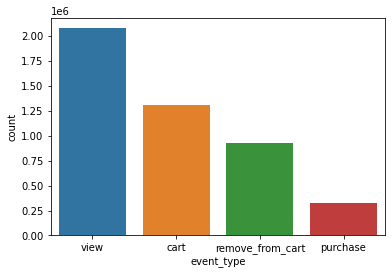

In [12]:
sns.countplot(x="event_type", data=data)

#### סעיף 6

In [15]:
new_df1 = data[['user_id','user_session','funnel_number','index_in_funnel']].copy()
new_df1['total_events'] = data.groupby('user_session')[['event_type']].transform('count')
new_df1['visit_duration'] = data.groupby(['funnel_number', 'user_session'])[["duration_to_next_event"]].transform('sum')

new_df2 = data.groupby(['user_id', 'user_session']).apply(lambda x: pd.Series({'list_of_viewed': list(x.loc[x['event_type'] == 'view', 'product_id']),'list_of_added_to_cart': list(x.loc[x['event_type'] == 'cart', 'product_id']),'list_of_purchased': list(x.loc[x['event_type'] == 'purchase', 'product_id'])})).reset_index()

session_data = pd.merge(new_df1, new_df2 , how = 'left', on = ['user_id', 'user_session'])
session_data.head()

,user_id,user_session,funnel_number,index_in_funnel,total_events,visit_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240],[],[]
1,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0,[5711145],[],[]
2,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0,[5814066],[],[]
3,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",[],[]
4,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",[],[]
